# Data

Kaggle Heart Disease UCI dataset: https://www.kaggle.com/ronitf/heart-disease-uci

# Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [35]:
continuous_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

plt.style.use('seaborn-whitegrid')

# Load data

In [3]:
df = pd.read_csv('heart-disease.csv')

# EDA

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

###  1. Label distribution

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

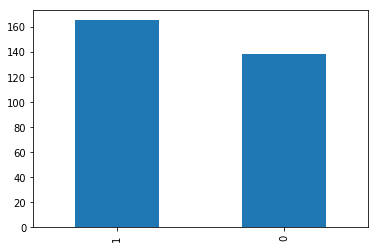

In [8]:
df['target'].value_counts().plot(kind='bar')

### 2. Missing data

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3. Check feature distribution and crosstab analysis

In [36]:
def show_feature_distribution(data, bins):
    plt.figure(figsize=(10,5))
    sns.distplot(data, bins=bins)

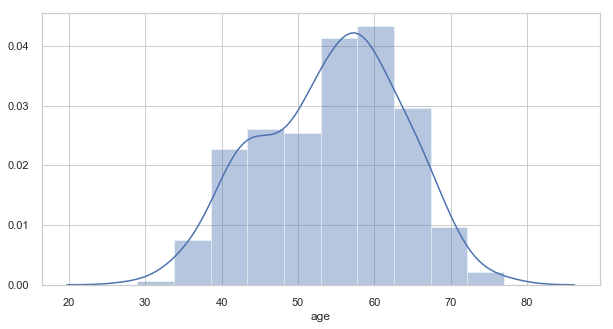

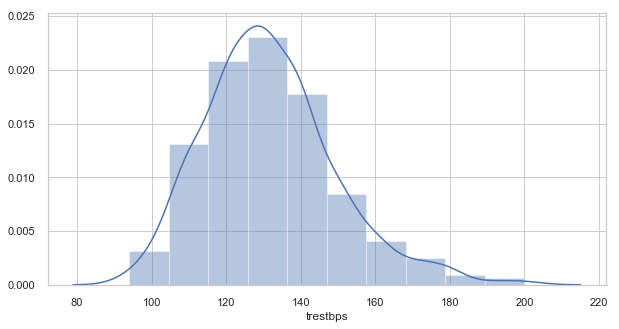

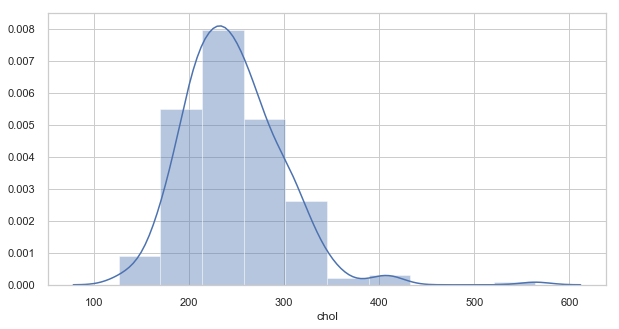

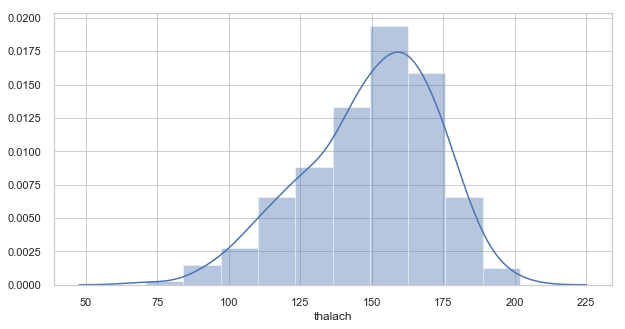

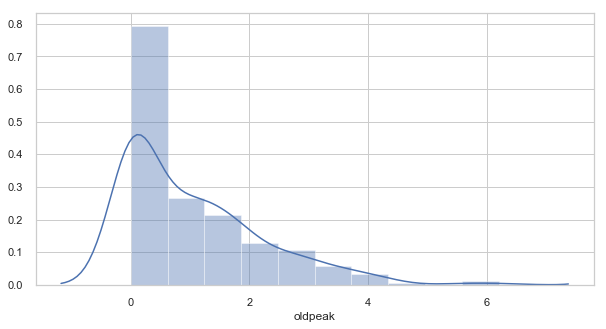

In [59]:
for col in continuous_data:
    show_feature_distribution(df[col], 10)

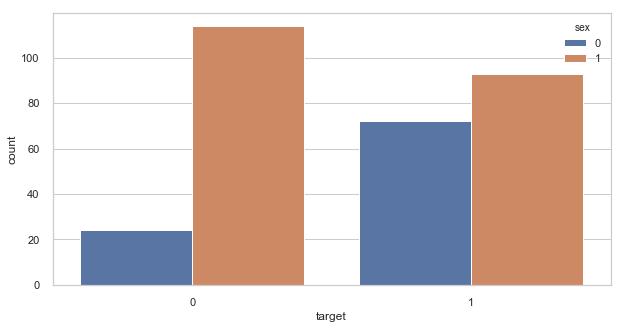

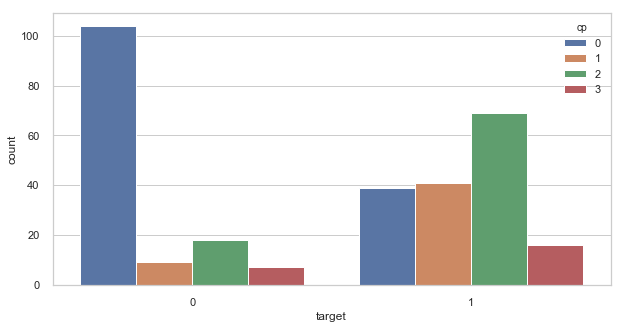

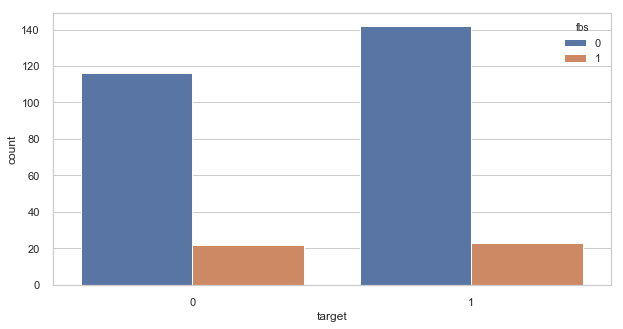

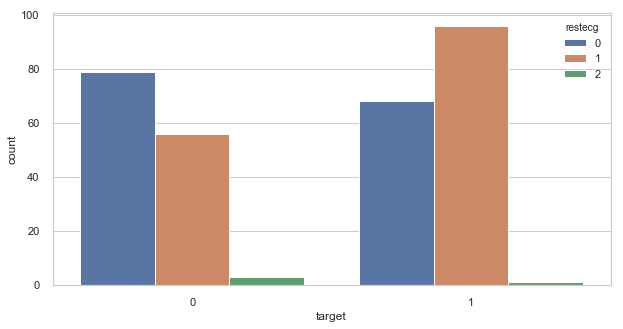

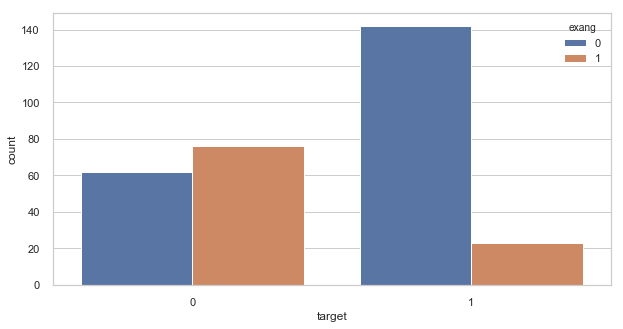

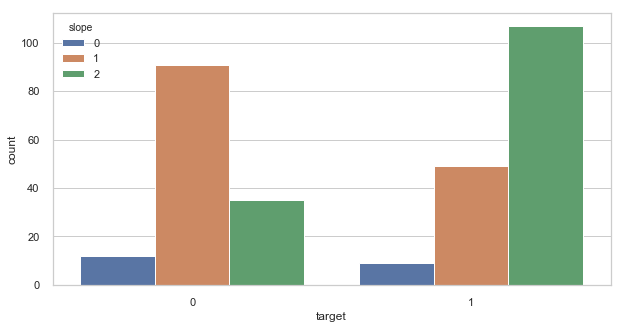

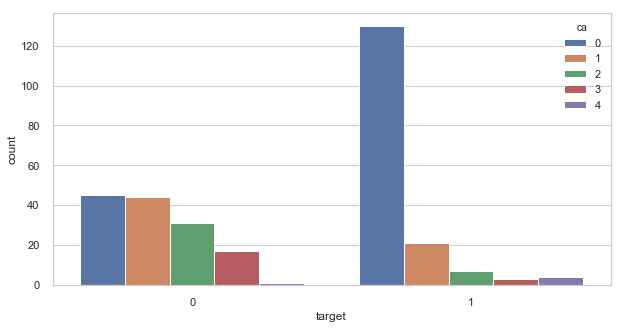

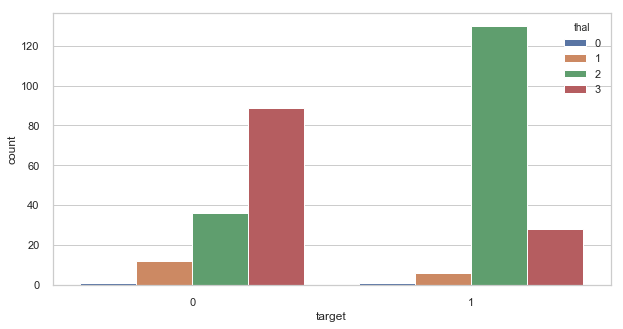

In [58]:
def show_crosstab_with_target(target, feature):
    plt.figure(figsize=(10,5))
    sns.countplot(target, hue=feature)

for col in categorical_data:
    show_crosstab_with_target(df['target'], df[col])

### 4. Features correlation

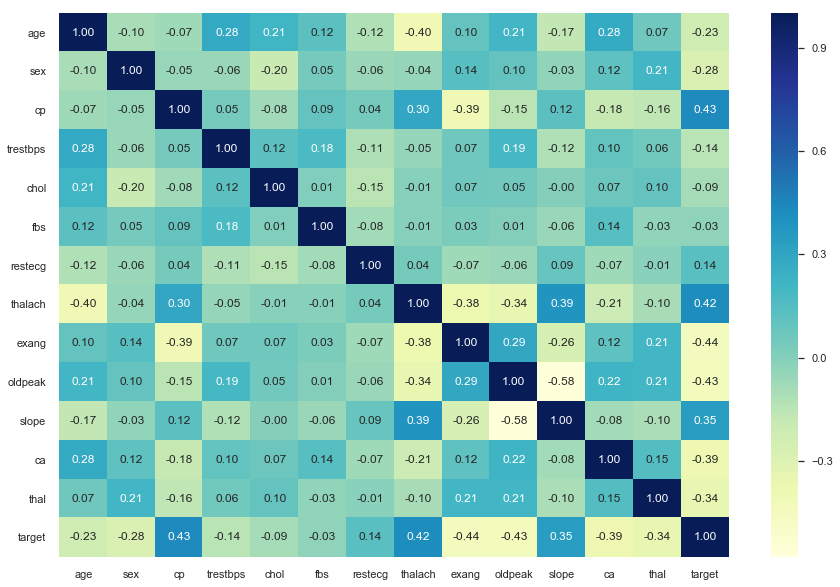

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

# Modeling

### 1. Prepare data

In [71]:
np.random.seed(0)

In [72]:
X = df.iloc[:, :-1]
y = df['target']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 2. Train baseline models

In [105]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model Name: {}'.format(name))
    print('Accuracy: {}'.format(model.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print('-------------------------')

Model Name: Logistic Regression
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

-------------------------
Model Name: KNN
Accuracy: 0.639344262295082
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

   micro avg       0.64      0.64      0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

-------------------------
Model Name: Random Forest
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.90   

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 3. Tune the best model with GridSearchCV

In [100]:
grid = {
    "n_estimators": np.arange(10, 250, 50),
    "max_depth": [None, 3, 5],
    "min_samples_split": np.arange(2, 8, 2),
    "min_samples_leaf": np.arange(1, 7, 2)
}

gs_rf = GridSearchCV(RandomForestClassifier(), grid, cv=3, verbose=1)
gs_rf.fit(X, y)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   39.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 10,  60, 110, 160, 210]), 'max_depth': [None, 3, 5], 'min_samples_split': array([2, 4, 6]), 'min_samples_leaf': array([1, 3, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [101]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 60}

In [102]:
gs_rf.best_score_

0.8547854785478548

# Evaluation

In [106]:
y_pred = gs_rf.predict(X_test)

### 1. Confusion matrix

Text(0.5, 28.5, 'Predictions')

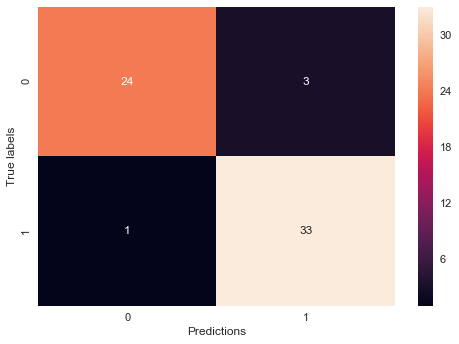

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True labels')
plt.xlabel('Predictions')

### 2. Classfication report

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.92      0.97      0.94        34

   micro avg       0.93      0.93      0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



### 3. Feature importances

In [116]:
gs_rf.best_estimator_.feature_importances_

array([0.06975884, 0.0281599 , 0.15789737, 0.03781992, 0.04337582,
       0.00311718, 0.01698639, 0.10267259, 0.0648625 , 0.11730615,
       0.07071525, 0.14013485, 0.14719326])

In [127]:
feature_df = pd.Series(gs_rf.best_estimator_.feature_importances_, index=df.columns[:-1], name='feature_importance').to_frame()

In [133]:
feature_df

,feature_importance
age,0.069759
sex,0.028160
cp,0.157897
trestbps,0.037820
chol,0.043376
fbs,0.003117
restecg,0.016986
thalach,0.102673
exang,0.064863
oldpeak,0.117306


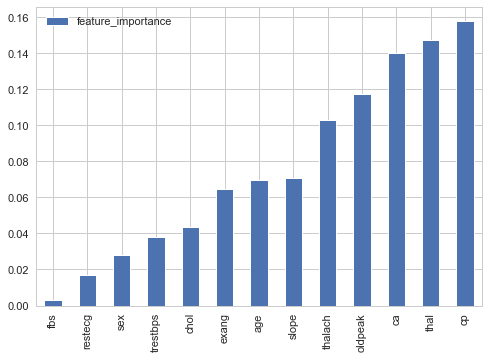

In [131]:
feature_df.sort_values('feature_importance').plot(kind='bar')